# Predicting a Pulsar

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv("pulsar_stars.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17898 non-null  float64
 1   Standard deviation of the integrated profile  17898 non-null  float64
 2   Excess kurtosis of the integrated profile     17898 non-null  float64
 3   Skewness of the integrated profile            17898 non-null  float64
 4   Mean of the DM-SNR curve                      17898 non-null  float64
 5   Standard deviation of the DM-SNR curve        17898 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7   Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                  17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


### Pulsar's Integrated Profile

In [3]:
%%html
<img src="pulsar_IP.png">

In [4]:
%%html
<img src='pulsar_IPs2.jpg'>

### Pulsar's dispersion measure signal-to-noise ration curve (DM-SNR curve)

In [5]:
%%html
<img src='dm-snr3.PNG'>

In [5]:
dataset.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


## EDA

In [4]:
import collections
print(collections.Counter(dataset['target_class']))

Counter({0: 16259, 1: 1639})


Looks like ~10% of the total data belongs positive class.

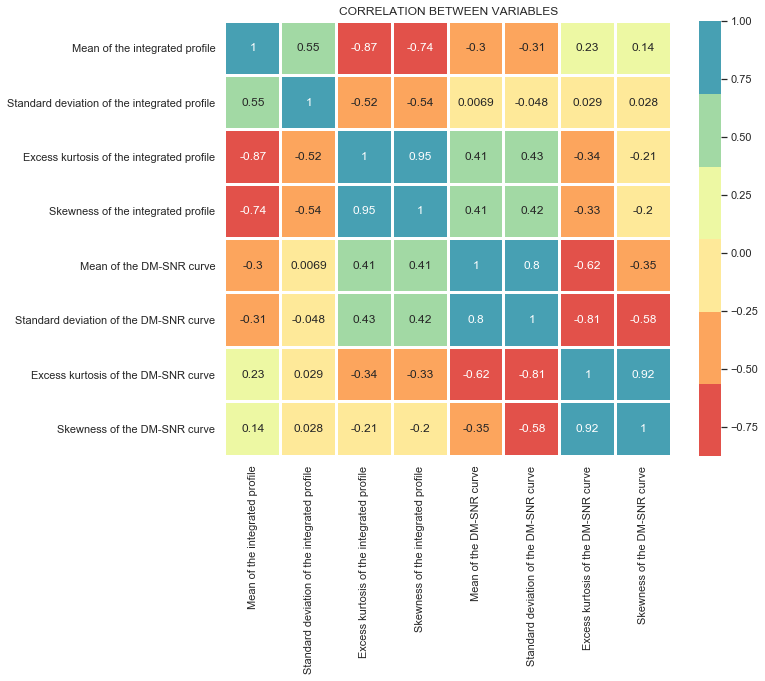

In [6]:
correlation = dataset[['Mean of the integrated profile',
                       'Standard deviation of the integrated profile',
                       'Excess kurtosis of the integrated profile',
                       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
                       'Standard deviation of the DM-SNR curve',
                       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("Spectral"),
            linewidth=2,edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

In [7]:
cols = list(dataset.columns)
cols.remove("target_class")
print(cols)

['Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve']


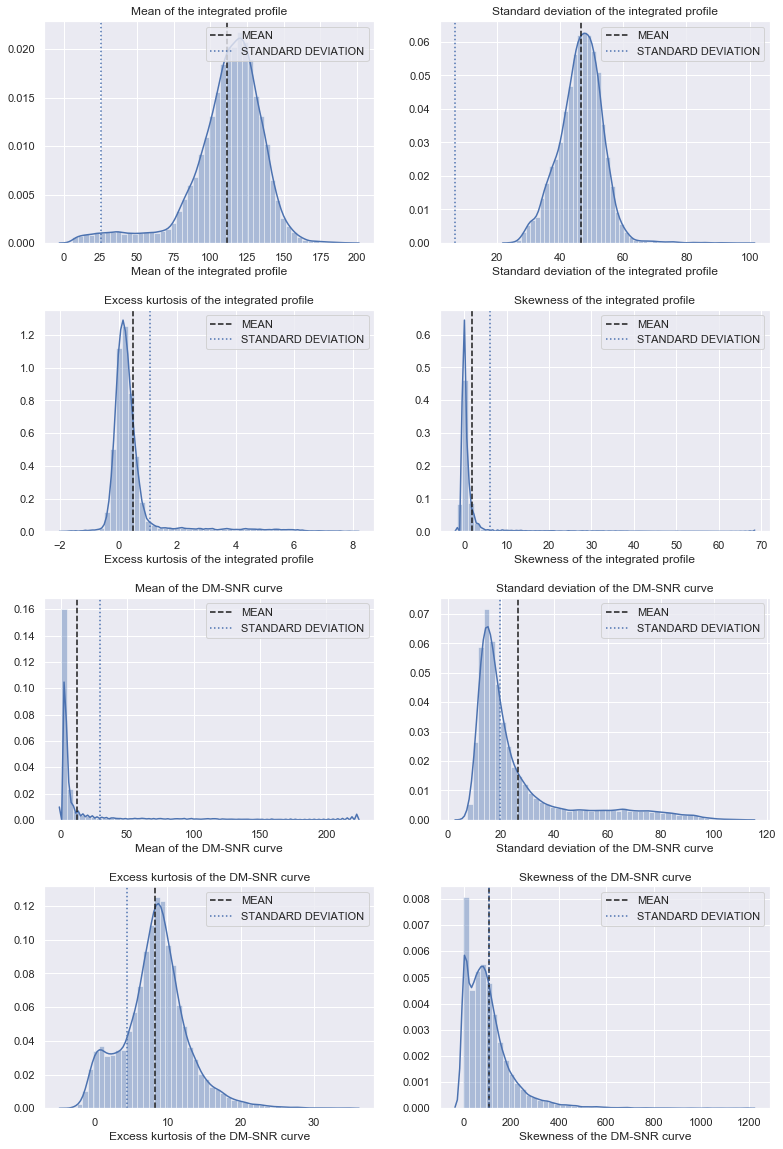

In [8]:
import itertools
columns = cols.copy()
length  = len(columns)

plt.figure(figsize=(13,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(length/2,length/4,j+1)
    sns.distplot(dataset[i])
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(dataset[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(dataset[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")

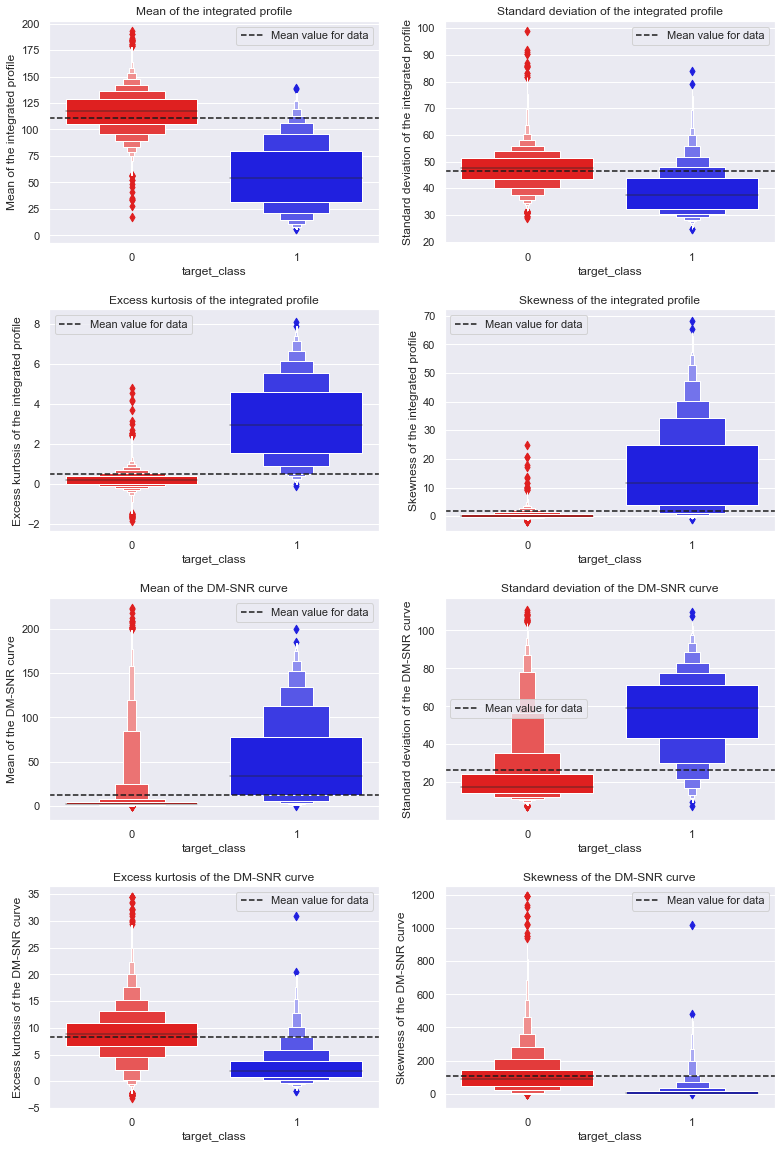

In [9]:
columns = [x for x in dataset.columns if x not in ["target_class"]]
length  = len(columns)
plt.figure(figsize=(13,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(4,2,j+1)
    sns.boxenplot(x=dataset["target_class"],y=dataset[i],palette=["red","blue"])
    plt.title(i)
    plt.subplots_adjust(hspace=.3)
    plt.axhline(dataset[i].mean(),linestyle = "dashed",color ="k",label ="Mean value for data")
    plt.legend(loc="best")

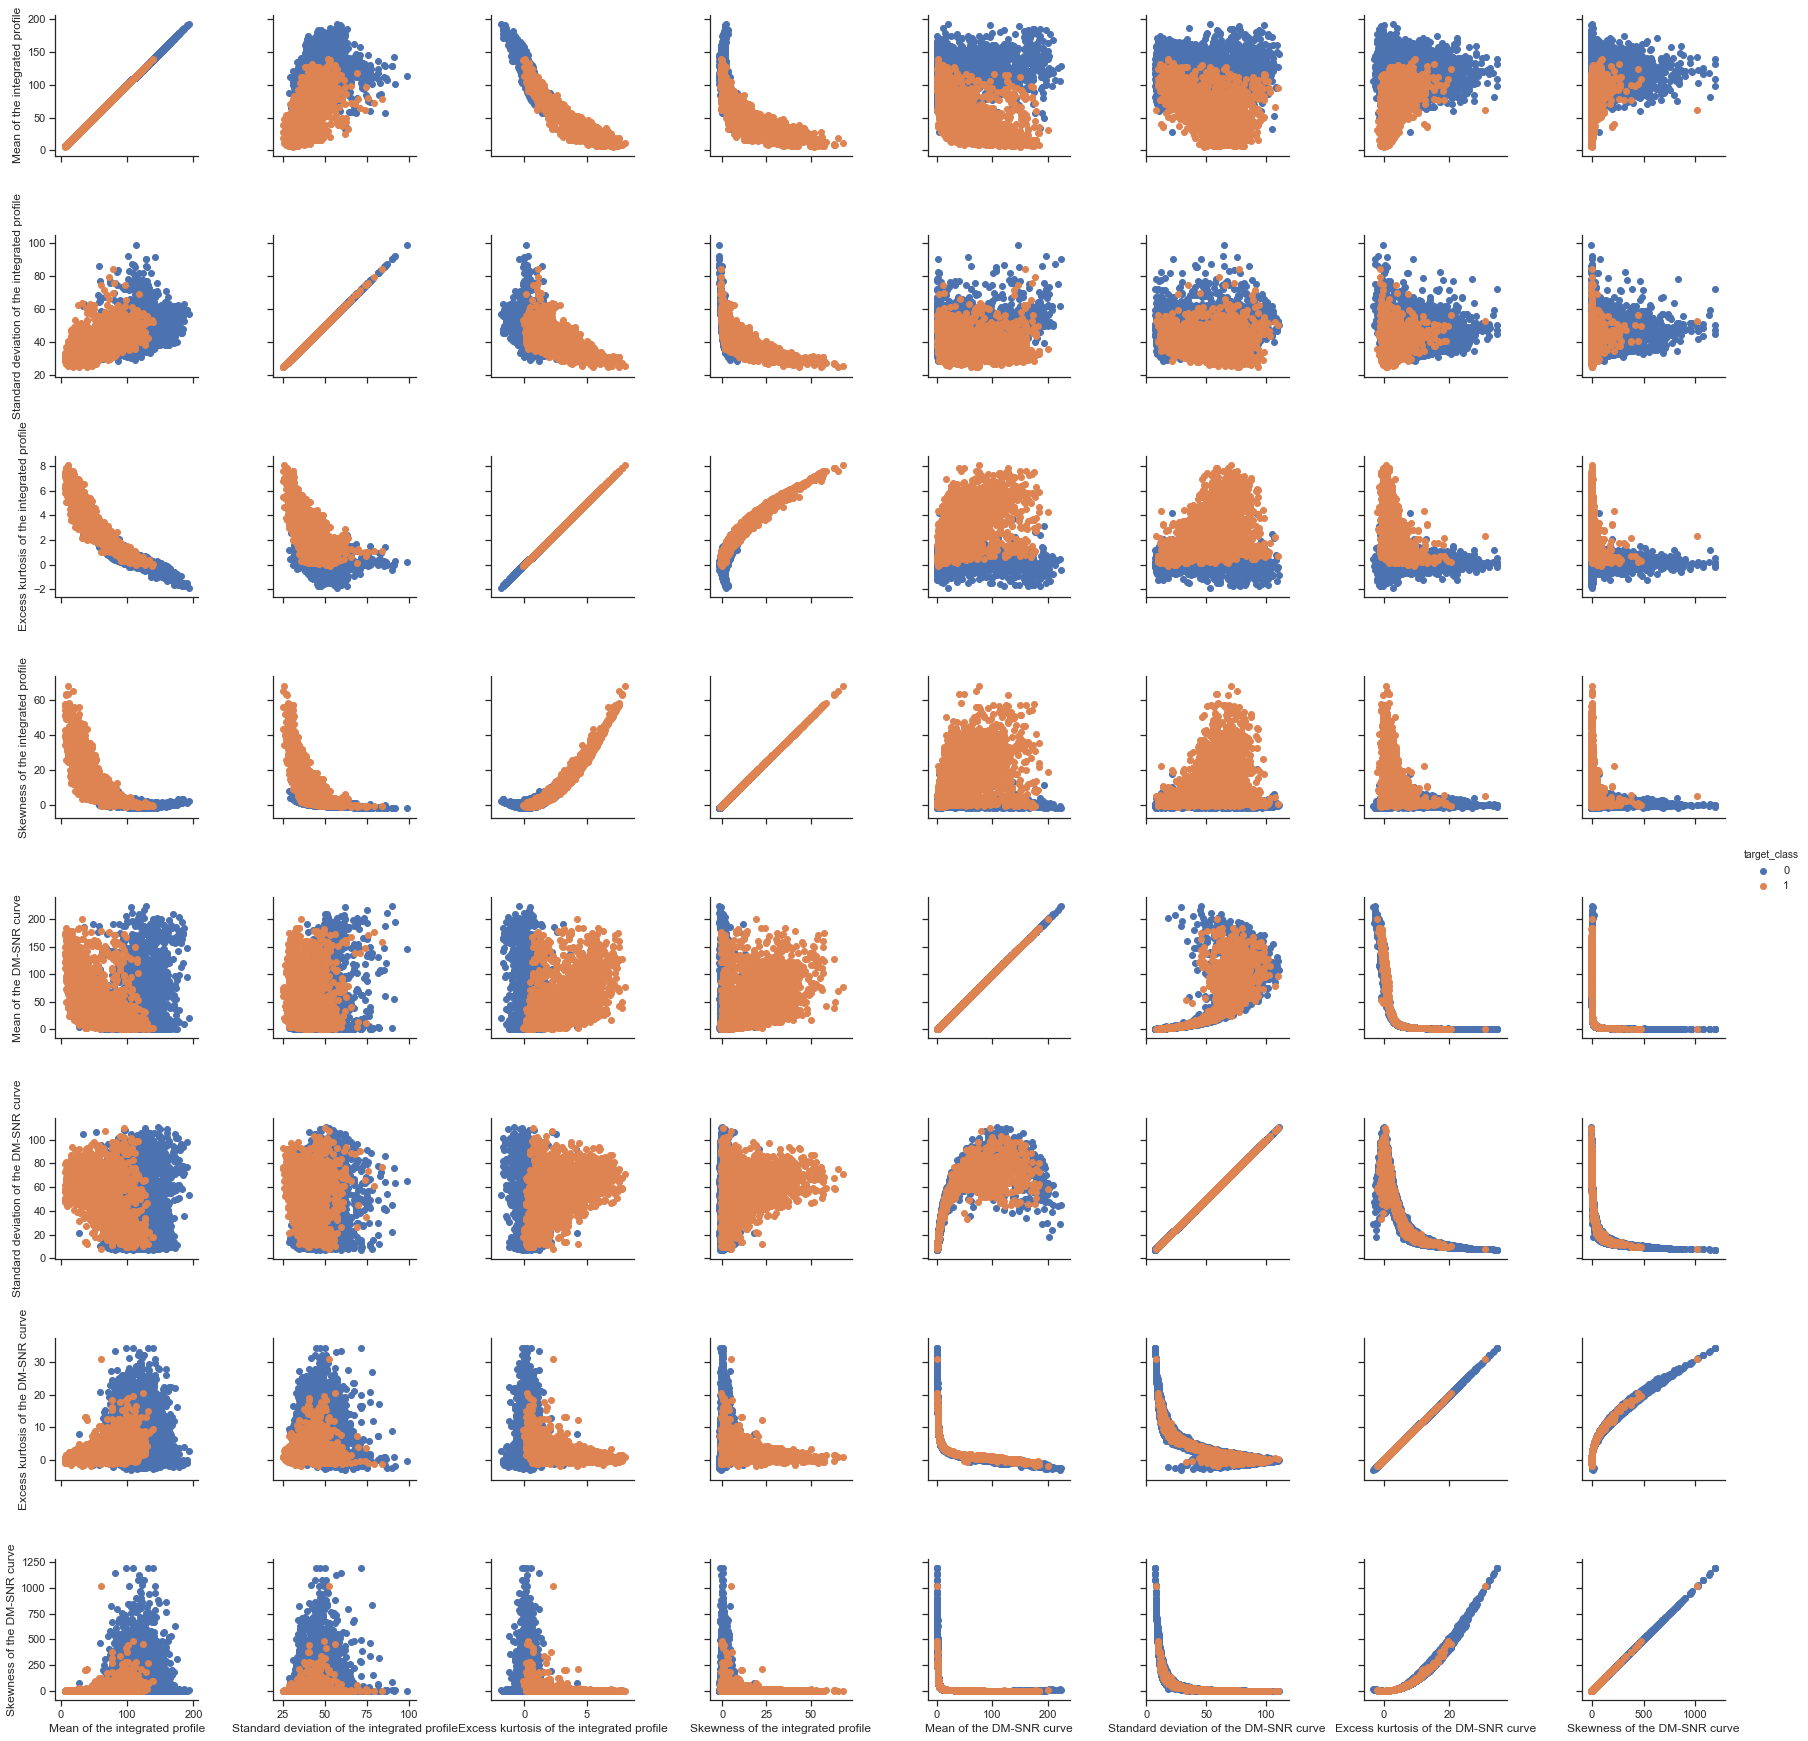

In [10]:
sns.set(style="ticks")
#sns.set_palette(sns.color_palette("husl", 8))
g = sns.PairGrid(data=dataset, hue="target_class", height=3)
g = g.map(plt.scatter)
g = g.add_legend()

## Normalize numerical attributes

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for feature in cols:
    dataset[feature] = scaler.fit_transform(dataset[[feature]]) 

## Split data into train and test sets

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['target_class'], axis=1), dataset['target_class'], test_size=0.20, random_state=42)
print(collections.Counter(y_train))
print(collections.Counter(y_test))

Counter({0: 13000, 1: 1318})
Counter({0: 3259, 1: 321})


## Helper Functions

In [12]:
from sklearn import metrics

#https://github.com/rayidghani/magicloops/blob/master/mlfunctions.py
def joint_sort_descending(l1, l2):
    # l1 and l2 have to be numpy arrays
    idx = np.argsort(l1)[::-1]
    return l1[idx], l2[idx]

def generate_binary_at_k(y_scores, k):
    cutoff_index = int(len(y_scores) * (k / 100.0))
    predictions_binary = [1 if x < cutoff_index else 0 for x in range(len(y_scores))]
    return predictions_binary

def precision_at_k(y_true, y_scores, k):
    #y_scores_sorted, y_true_sorted = zip(*sorted(zip(y_scores, y_true), reverse=True))
    y_scores_sorted, y_true_sorted = joint_sort_descending(np.array(y_scores), np.array(y_true))
    preds_at_k = generate_binary_at_k(y_scores_sorted, k)
    #precision, _, _, _ = metrics.precision_recall_fscore_support(y_true, preds_at_k)
    #precision = precision[1]  # only interested in precision for label 1
    precision = metrics.precision_score(y_true_sorted, preds_at_k)
    return precision

def recall_at_k(y_true, y_scores, k):
    #y_scores_sorted, y_true_sorted = zip(*sorted(zip(y_scores, y_true), reverse=True))
    y_scores_sorted, y_true_sorted = joint_sort_descending(np.array(y_scores), np.array(y_true))
    preds_at_k = generate_binary_at_k(y_scores_sorted, k)
    #precision, _, _, _ = metrics.precision_recall_fscore_support(y_true, preds_at_k)
    #precision = precision[1]  # only interested in precision for label 1
    recall = metrics.recall_score(y_true_sorted, preds_at_k)
    return recall


def plot_PR_curve(y_test, y_pred):
    y_score = y_pred
    precision_curve, recall_curve, pr_thresholds = metrics.precision_recall_curve(y_test, y_pred)
    precision_curve = precision_curve[:-1]
    recall_curve = recall_curve[:-1]
    pct_above_per_thresh = []
    number_scored = len(y_pred)
    for value in pr_thresholds:
        num_above_thresh = len(y_score[y_pred >= value])
        pct_above_thresh = num_above_thresh / float(number_scored)
        pct_above_per_thresh.append(pct_above_thresh)
    pct_above_per_thresh = np.array(pct_above_per_thresh)
    plt.clf()
    fig, ax1 = plt.subplots()
    ax1.plot(pct_above_per_thresh, precision_curve, 'b')
    ax1.set_xlabel('percent of population')
    ax1.set(ylim=(0, 1))

    ax1.set_ylabel('precision', color='b')
    ax2 = ax1.twinx()
    ax1.plot(pct_above_per_thresh, recall_curve, 'r')
    ax2.set_ylabel('recall', color='r')
    
    #filename = "Pipelevel_Predictions_RF\\"
    #plt.savefig(filename + str(year)+'_precision_recall.png', bbox_inches='tight')
    #plt.close()
    plt.tight_layout()
    plt.show()

def plot_ROC_curve(y_test, y_pred):
    fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred)
    roc_auc = metrics.auc(fpr,tpr)
    plt.clf()
    plt.title("ROC")
    plt.plot(fpr,tpr,'b',label='AUC = %0.2f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.tight_layout()
    plt.show()
    
def print_metrics(y_test, y_pred, k, threshold = 0.5):
    print("Precision", metrics.precision_score(y_test, y_pred > threshold))
    print("Recall",metrics.recall_score(y_test, y_pred > threshold))
    print("F1",metrics.f1_score(y_test, y_pred > threshold))
    print("AUC",metrics.roc_auc_score(y_test, y_pred))
    print("Precision @ ",k," ",precision_at_k(y_test, y_pred > threshold, k))
    print("Recall @ ",k," ",recall_at_k(y_test, y_pred > threshold, k))

## Oversample minority class

~10% of the data belongs to the positive, minority class (is_pulsar). To tackle this calss imbalance, oversample the minority (is_pulsar) instances.

In [13]:
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.combine import SMOTEENN

do_oversampling = False
if do_oversampling:
    print("Before SMOTE Train set: {}", collections.Counter(y_train))
    sm = SMOTE(random_state=10)
    X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
    print("SMOTE Train set: {}", collections.Counter(y_train_sm))
else:
    X_train_sm = X_train
    y_train_sm = y_train

# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Feature Importances

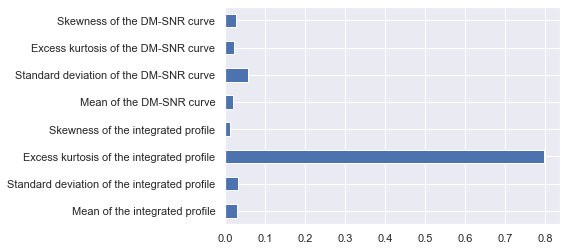

In [16]:
feat_importances = pd.Series(clf_dt.feature_importances_, index=cols)
feat_importances.plot(kind='barh')
plt.show()

### Evaluation

Accuracy:  0.9698324022346368
Precision 0.8256880733944955
Recall 0.8411214953271028
F1 0.8333333333333334
AUC 0.9118157338556347
Precision @  10   0.7541899441340782
Recall @  10   0.8411214953271028


<Figure size 432x288 with 0 Axes>

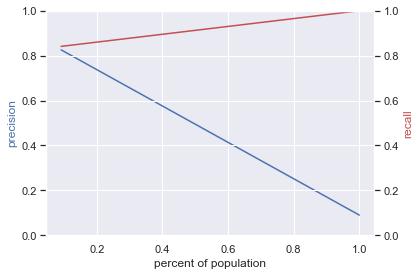

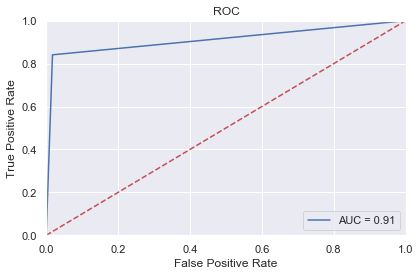

In [17]:
accuracy = clf_dt.score(X_test, y_test)
print("Accuracy: ", accuracy)
y_pred = clf_dt.predict_proba(X_test)[:, 1]
k = 10
print_metrics(y_test,y_pred,k)
plot_PR_curve(y_test, y_pred)
plot_ROC_curve(y_test, y_pred)

### Confusion Matrix

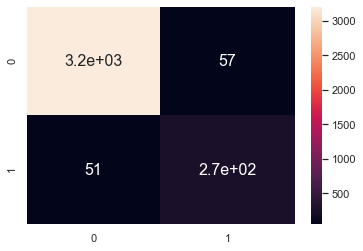

In [18]:
from sklearn.metrics import confusion_matrix
actual_label = y_test
predicted_label = (y_pred>0.5).astype(int)
cm = metrics.confusion_matrix(actual_label,predicted_label)
sns.heatmap(cm, annot=True, annot_kws = {"size": 16})

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf_rf= RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, class_weight="balanced", verbose = 1)
clf_rf.fit(X_train_sm, y_train_sm)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

### Feature importances

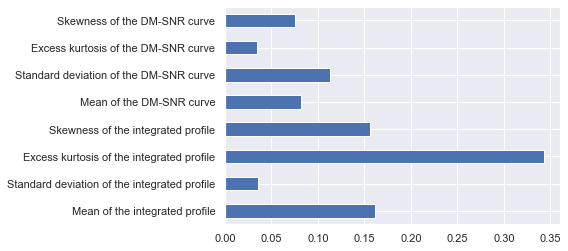

In [20]:
feat_importances = pd.Series(clf_rf.feature_importances_, index=cols)
feat_importances.plot(kind='barh')
plt.show()

### Evaluation

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Accuracy:  0.9807262569832402
Precision 0.9375
Recall 0.8411214953271028
F1 0.8866995073891626
AUC 0.9711983780358059
Precision @  10   0.7541899441340782
Recall @  10   0.8411214953271028


<Figure size 432x288 with 0 Axes>

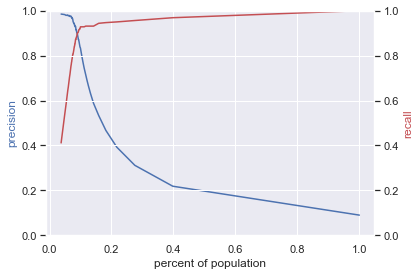

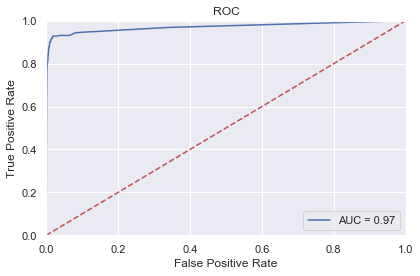

In [21]:
accuracy = clf_rf.score(X_test, y_test)
print("Accuracy: ", accuracy)
y_pred = clf_rf.predict_proba(X_test)[:, 1]
k = 10
print_metrics(y_test,y_pred,k)
plot_PR_curve(y_test, y_pred)
plot_ROC_curve(y_test, y_pred)

### Confusion Matrix

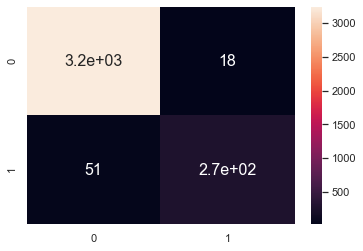

In [22]:
from sklearn.metrics import confusion_matrix
actual_label = y_test
predicted_label = (y_pred>0.5).astype(int)
cm = metrics.confusion_matrix(actual_label,predicted_label)
sns.heatmap(cm, annot=True, annot_kws = {"size": 16})

# Nearest Neighbour

In [23]:
from sklearn.neighbors import KNeighborsClassifier
clf_nn = KNeighborsClassifier(n_neighbors=3)
clf_nn.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Evaluation

Accuracy:  0.9804469273743017
Precision 0.9141914191419142
Recall 0.8629283489096573
F1 0.8878205128205128
AUC 0.9538168446066917
Precision @  10   0.7793296089385475
Recall @  10   0.8691588785046729


<Figure size 432x288 with 0 Axes>

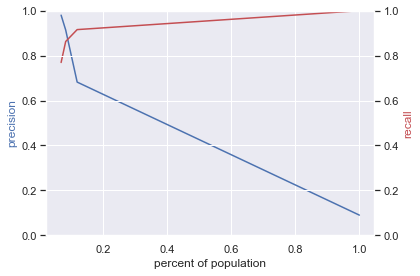

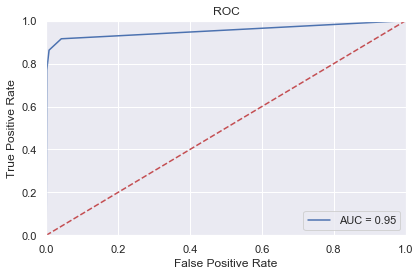

In [24]:
accuracy = clf_nn.score(X_test, y_test)
print("Accuracy: ", accuracy)
y_pred = clf_nn.predict_proba(X_test)[:, 1]
k = 10
print_metrics(y_test,y_pred,k)
plot_PR_curve(y_test, y_pred)
plot_ROC_curve(y_test, y_pred)

### Confusion Matrix

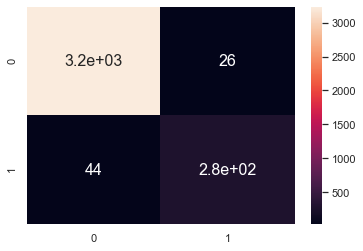

In [25]:
from sklearn.metrics import confusion_matrix
actual_label = y_test
predicted_label = (y_pred>0.5).astype(int)
cm = metrics.confusion_matrix(actual_label,predicted_label)
sns.heatmap(cm, annot=True, annot_kws = {"size": 16})

### Effect of k (number of neighbors)

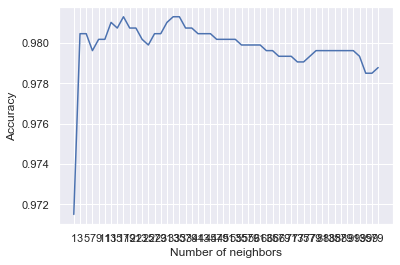

In [27]:
accuracies = []
k_vals = range(1,100,2)
for k in k_vals:
    clf_nn = KNeighborsClassifier(n_neighbors=k)
    clf_nn.fit(X_train_sm, y_train_sm)
    accuracies.append(clf_nn.score(X_test, y_test))
plt.plot(k_vals, accuracies)
plt.xlabel('Number of neighbors')
plt.xticks(k_vals)
plt.ylabel('Accuracy')
plt.show()

# Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()
clf_nb.fit(X_train_sm, y_train_sm)

GaussianNB(priors=None, var_smoothing=1e-09)

### Evaluation

Accuracy:  0.9474860335195531
Precision 0.6587112171837709
Recall 0.8598130841121495
F1 0.745945945945946
AUC 0.9584037111703129
Precision @  10   0.659217877094972
Recall @  10   0.735202492211838


<Figure size 432x288 with 0 Axes>

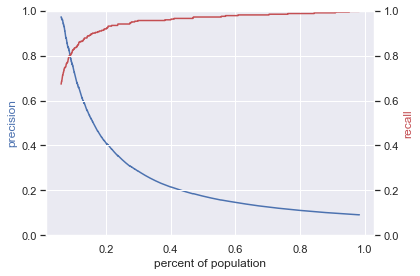

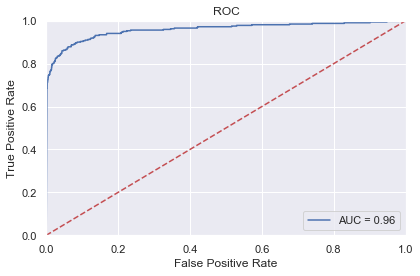

In [29]:
accuracy = clf_nb.score(X_test, y_test)
print("Accuracy: ", accuracy)
y_pred = clf_nb.predict_proba(X_test)[:, 1]
k = 10
print_metrics(y_test,y_pred,k)
plot_PR_curve(y_test, y_pred)
plot_ROC_curve(y_test, y_pred)

### Confusion Matrix

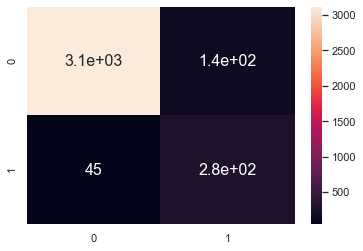

In [30]:
from sklearn.metrics import confusion_matrix
actual_label = y_test
predicted_label = (y_pred>0.5).astype(int)
cm = metrics.confusion_matrix(actual_label,predicted_label)
sns.heatmap(cm, annot=True, annot_kws = {"size": 16})

# Conclusions

[TODO]